In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import fileio
import numpy as np
import seaborn as sns
import keys
import matplotlib.pyplot as plt
import pandas as pd
from utils import number_countplot, play_from_label
from IPython import display

In [4]:
# plt.rcParams['figure.figsize'] = [6.0, 4.0]  # Default
plt.rcParams['figure.figsize'] = [3.0, 2.0]
WIDEFIG_SIZE = (5.0, 3.0)

In [5]:
DATA_DIR = './data/working'

labels = pd.read_pickle("{}/labels.pkl".format(DATA_DIR))

with np.load("{}/splits.npz".format(DATA_DIR)) as splits:
    train_idx = splits['train_idx']
    test_idx = splits['test_idx']

X = np.load("{}/X_cqt.npz".format(DATA_DIR))['X']
X_train = X[train_idx, :]
X_test = X[test_idx, :]

Y = np.load("{}/Y.npz".format(DATA_DIR))['Y']
Y_train = Y[train_idx, :]
Y_test = Y[test_idx, :]

with np.load("{}/data_aug.npz".format(DATA_DIR)) as data:
    X_aug = data['X']
    Y_aug = data['Y']
X_train_aug = np.vstack([X_train, X_aug])
Y_train_aug = np.vstack([Y_train, Y_aug])

In [6]:
X.shape

(16910, 144, 151)

In [7]:
Y.shape

(16910, 24)

In [8]:
labels.shape

(16910, 11)

In [9]:
y_keys = np.argmax(Y, axis=1)

In [10]:
y_keys.shape

(16910,)

In [11]:
labels_aug = pd.DataFrame(np.argmax(Y_aug, axis=1), columns=['key'])

In [12]:
labels_aug['raw'] = 0.0
labels_aug['dataset'] = 'augmented'

In [13]:
labels_train_aug = pd.concat([labels.iloc[train_idx], labels_aug], axis=0, sort=False)

# Plots

In [14]:
def analyse_labels(labels_to_plot, fig_loc, widefig_size=WIDEFIG_SIZE):
    # Countplot of datasets
    g = sns.countplot(labels_to_plot['dataset'])
    number_countplot()
    plt.savefig(fig_loc.format('dataset_count.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('dataset_count.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Countplot of keys
    plt.figure(figsize=widefig_size)
    g = sns.countplot(labels_to_plot['key'])
    number_countplot()
    plt.xticks(range(24), [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in range(24)], rotation=90)
    plt.savefig(fig_loc.format('key_count.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('key_count.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Countplot of keys broken down by dataset
    plt.figure(figsize=widefig_size)
    g = sns.countplot('key', hue='dataset', data=labels_to_plot)
    plt.xticks(range(24), [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in range(24)], rotation=90)
    plt.savefig(fig_loc.format('key_count_by_dataset.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('key_count_by_dataset.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Proportion plot of keys broken down by dataset
    plt.figure(figsize=widefig_size)
    df = labels_to_plot
    x, y, hue = "key", "prop", "dataset"

    prop_df = (df[x]
               .groupby(df[hue])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    sns.barplot(x=x, y=y, hue=hue, data=prop_df)

    plt.xticks(range(24), [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in range(24)], rotation=90)
    plt.savefig(fig_loc.format('key_prop_by_dataset.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('key_prop_by_dataset.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Countplot of major and minor keys
    g = sns.countplot(labels_to_plot['majmin'])
    number_countplot()
    plt.savefig(fig_loc.format('majmin_count.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('majmin_count.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Countplot of major and minor keys broken down by dataset
    g = sns.countplot('majmin', hue='dataset', data=labels)
    number_countplot()
    plt.savefig(fig_loc.format('majmin_count_by_dataset.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('majmin_count_by_dataset.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Proportion of major and minor keys broken down by dataset
    df = labels_to_plot
    x, y, hue = "majmin", "prop", "dataset"

    prop_df = (df[x]
               .groupby(df[hue])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    sns.barplot(x=x, y=y, hue=hue, data=prop_df)
    plt.savefig(fig_loc.format('majmin_prop_by_dataset.pdf'), dpi=300, bbox_inches="tight")
    plt.savefig(fig_loc.format('majmin_prop_by_dataset.png'), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Genres - Genre not really worth saving as not aligned
    plt.figure(figsize=(10,4))
    sns.countplot('genre', hue='dataset', data=labels_to_plot)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=(10,4))
    g = sns.countplot('genre', hue='majmin', data=labels_to_plot)
    plt.xticks(rotation=90)
    plt.show()

# All data

In [15]:
labels_to_plot = labels
fig_loc = 'figs/all_data__{}'

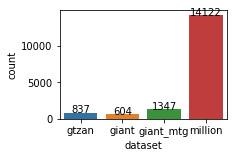

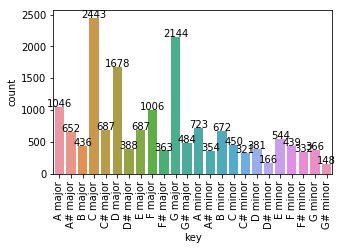

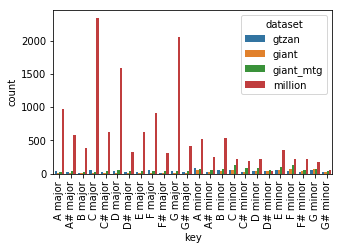

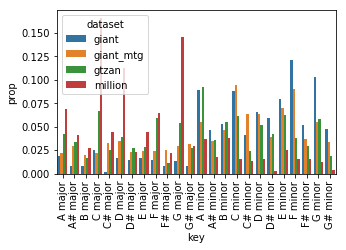

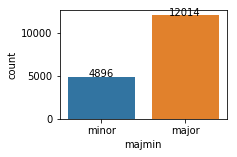

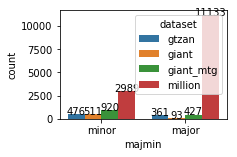

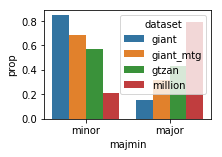

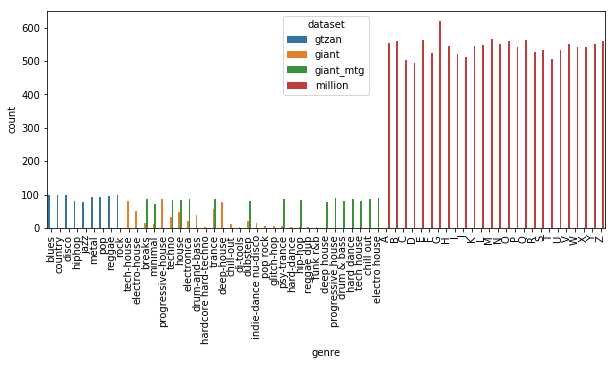

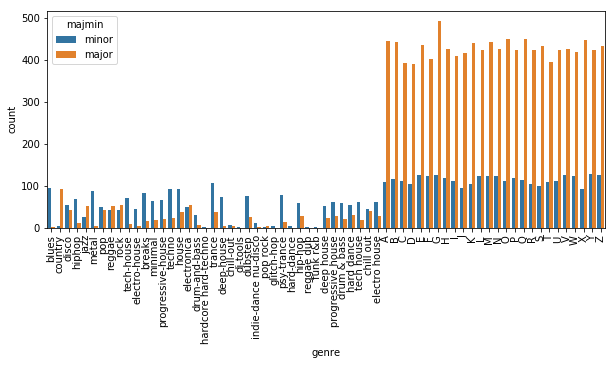

In [16]:
analyse_labels(labels_to_plot, fig_loc)

# Training Data

In [17]:
labels_to_plot = labels.iloc[train_idx]
fig_loc = 'figs/training_data__{}'

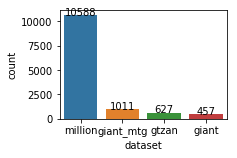

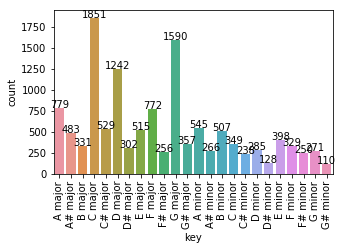

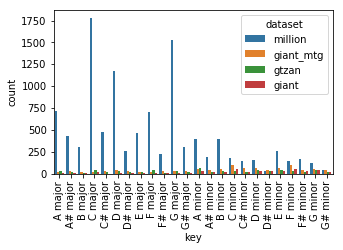

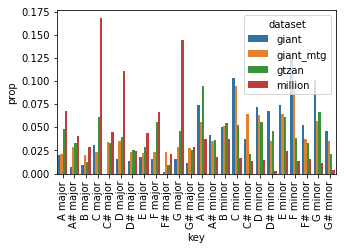

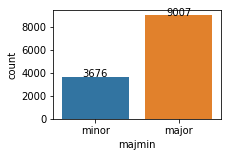

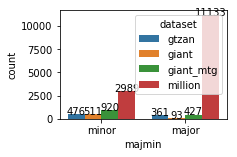

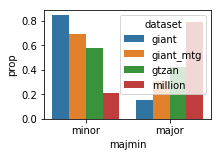

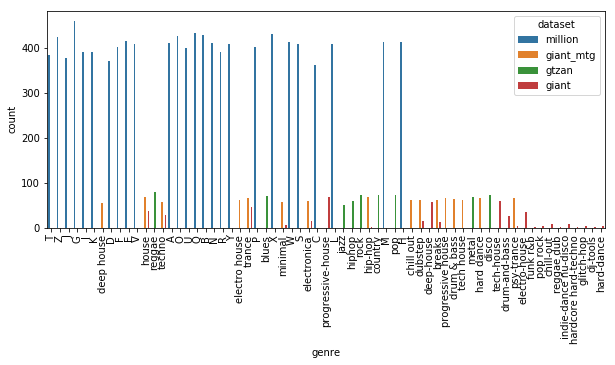

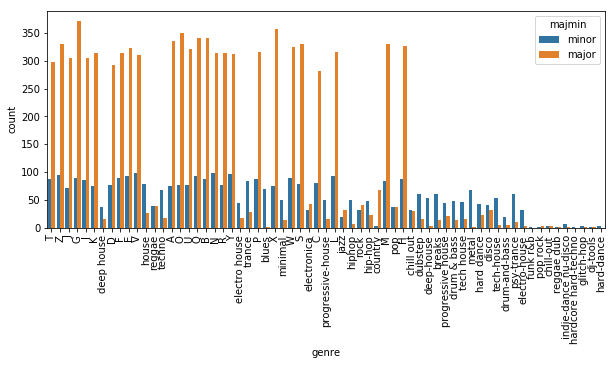

In [18]:
analyse_labels(labels_to_plot, fig_loc)

# Testing Data

In [19]:
labels_to_plot = labels.iloc[test_idx]
fig_loc = 'figs/test_data__{}'

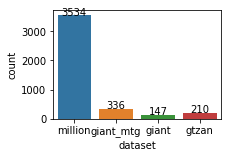

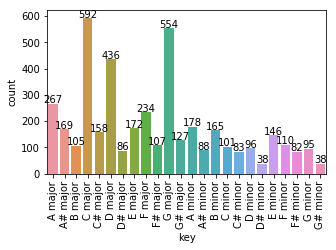

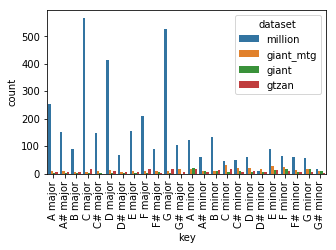

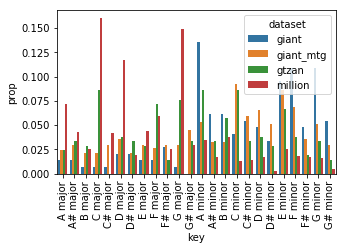

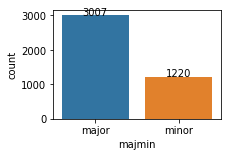

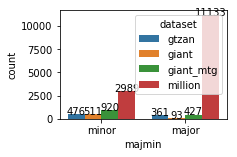

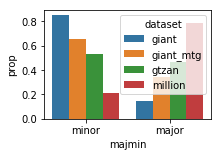

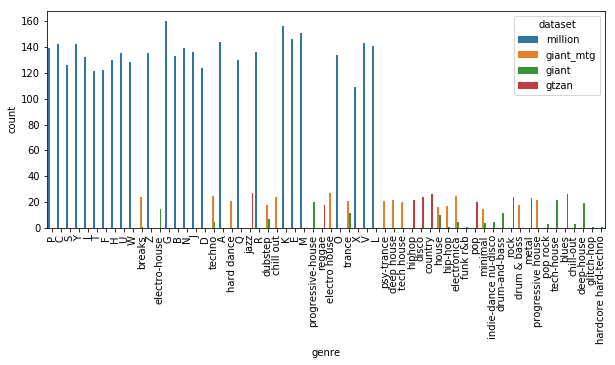

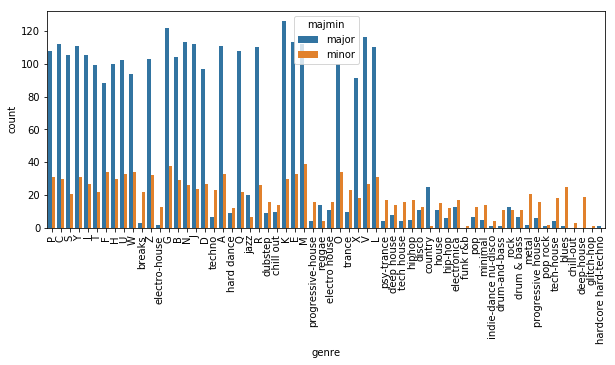

In [20]:
analyse_labels(labels_to_plot, fig_loc)

# Augmented Training Data

In [21]:
labels_to_plot = labels_train_aug
fig_loc = 'figs/augmented_test_data__{}'

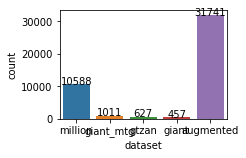

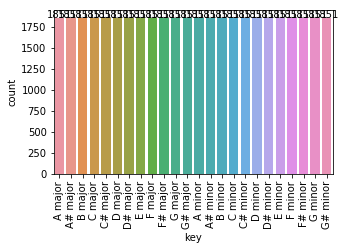

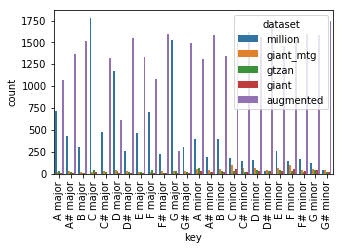

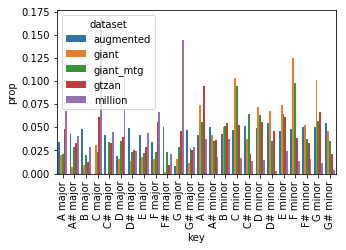

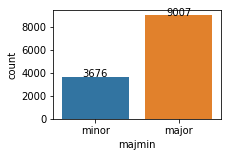

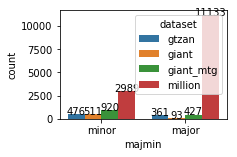

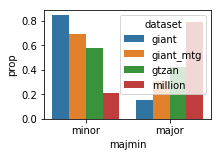

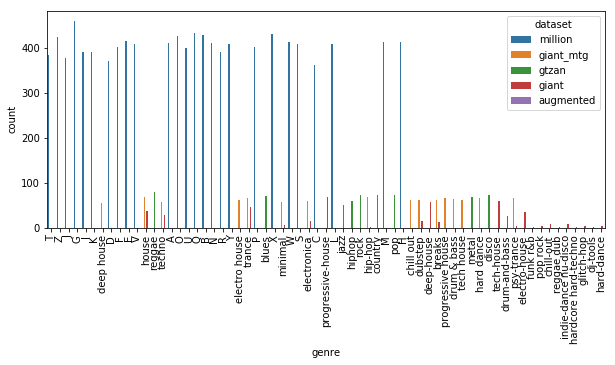

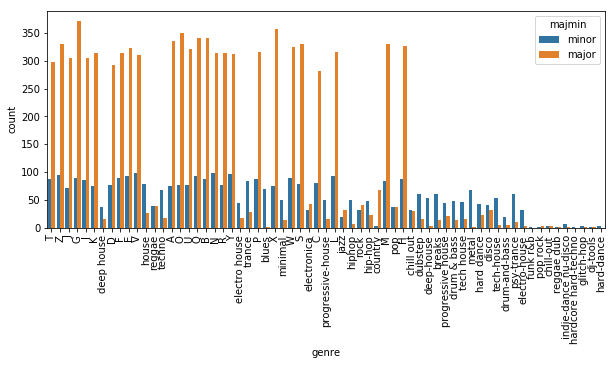

In [22]:
analyse_labels(labels_to_plot, fig_loc)

## Play shit!

In [23]:
idx = np.random.choice(X.shape[1])
print(idx)
display.display(labels.iloc[idx])
play_from_label(labels.iloc[idx])

109


chunk_idx                                           11
chunk_nr                                             2
filepath      data/raw/genres/country/country.00011.au
genre                                          country
key                                                 10
key_shift                                            0
key_str                                        G major
raw                                                  1
time_shift                                           1
majmin                                           major
dataset                                          gtzan
Name: 109, dtype: object

Idx 33 data/raw/genres/blues/blues.00033.au is mislabeled as F minor, it's F major.